<a href="https://colab.research.google.com/github/dacado0122-create/Colab/blob/main/red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn

# Datos
x = torch.linspace(-1, 1, 700).unsqueeze(1)   # valores originales
y = x ** 3                                    # valores de la función directa (x³)

#  Ahora invertimos: queremos que la red aprenda x = f⁻¹(y)
entrada  = y
salida = x

# Red neuronal simple
model = nn.Sequential(
    nn.Linear(1, 80),
    nn.Tanh(),
    nn.Linear(80, 60),
    nn.Tanh(),
    nn.Linear(60, 80),
    nn.Tanh(),
    nn.Linear(80, 1)
)

# Función de pérdida y optimizador
FP = nn.MSELoss()
optimizador = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento
for epoch in range(2000):
    entradas = model(entrada )       # predice x a partir de y
    perdida = FP(entradas, salida)

    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    if epoch % 200 == 0:
        print(f"Época {epoch}, pérdida = {perdida.item():.6f}")

# 🔍 Prueba
test_y = torch.tensor([[8.0]])   # entrada = y = x³ = 8
pred_x = model(test_y)
print("\nEntrada (x³):", test_y.item())
print("Predicción (x):", pred_x.item())
print("Valor real (x):", test_y.item() ** (1/3))


Época 0, pérdida = 0.293431
Época 200, pérdida = 0.042700
Época 400, pérdida = 0.041551
Época 600, pérdida = 0.040204
Época 800, pérdida = 0.038624
Época 1000, pérdida = 0.036783
Época 1200, pérdida = 0.034678
Época 1400, pérdida = 0.032341
Época 1600, pérdida = 0.029841
Época 1800, pérdida = 0.027282

Entrada (x³): 8.0
Predicción (x): 1.14922034740448
Valor real (x): 2.0


**para la funcion  x2**  
==

Época 200/1500 - Pérdida: 0.010592
Época 400/1500 - Pérdida: 0.002661
Época 600/1500 - Pérdida: 0.001860
Época 800/1500 - Pérdida: 0.003583
Época 1000/1500 - Pérdida: 0.003462
Época 1200/1500 - Pérdida: 0.004592
Época 1400/1500 - Pérdida: 0.004447

Resultados:
   y       √y (real)     predicción de la red
  0.25       0.5000           0.4272
  1.00       1.0000           0.9877
  4.00       2.0000           1.9578
  9.00       3.0000           2.9291
 16.00       4.0000           3.9591
 25.00       5.0000           4.8212


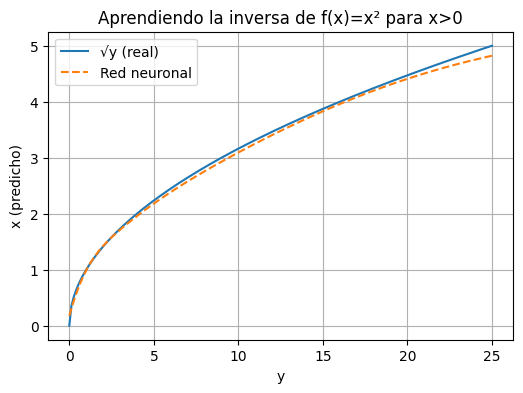

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


#  Datos: solo x positivos

x = torch.linspace(0, 5, 200).unsqueeze(1)  # x >= 0
y = x ** 2                                  # y = x^2


#  Definir la red

class InverseNet(nn.Module):
    def __init__(self):
        super(InverseNet, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.act = nn.Tanh()  # activación no lineal

    def forward(self, y):
        out = self.fc1(y)
        out = self.act(out)
        out = self.fc2(out)
        out = self.act(out)
        out = self.fc3(out)
        return out


# 3. Crear el modelo, criterio y optimizador

model = InverseNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# 4. Entrenamiento

epochs = 1500
for epoch in range(epochs):
    # Predicción
    x_pred = model(y)

    # Calcular pérdida (error cuadrático)
    loss = criterion(x_pred, x)

    # Gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss.item():.6f}")


# 5. Evaluación

y_test = torch.tensor([[0.25], [1.0], [4.0], [9.0], [16.0], [25.0]])
x_real = torch.sqrt(y_test)
x_pred = model(y_test)

print("\nResultados:")
print("   y       √y (real)     predicción de la red")
for i in range(len(y_test)):
    print(f"{y_test[i].item():6.2f}     {x_real[i].item():8.4f}         {x_pred[i].item():8.4f}")


# 6. Visualizar resultados

y_plot = torch.linspace(0, 25, 200).unsqueeze(1)
x_real_plot = torch.sqrt(y_plot)
x_nn_plot = model(y_plot).detach()

plt.figure(figsize=(6,4))
plt.plot(y_plot, x_real_plot, label="√y (real)")
plt.plot(y_plot, x_nn_plot, label="Red neuronal", linestyle='--')
plt.xlabel("y")
plt.ylabel("x (predicho)")
plt.title("Aprendiendo la inversa de f(x)=x² para x>0")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import torch
import torch.nn as nn

# Datos
x = torch.linspace(-1, 1, 700).unsqueeze(1)   # valores originales
y = x ** 3                                    # valores de la función directa (x³)

#  Ahora invertimos: queremos que la red aprenda x = f⁻¹(y)
entrada  = y
salida = x

# Red neuronal simple

class InverseNet(nn.Module):
    def __init__(self):
        super(InverseNet, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.act = nn.Tanh()  # activación no lineal

    def forward(self, entrada):
        out = self.fc1(entrada)
        out = self.act(out)
        out = self.fc2(out)
        out = self.act(out)
        out = self.fc3(out)
        return out

# Función de pérdida y optimizador
model = InverseNet()
FP = nn.MSELoss()
optimizador = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento
for epoch in range(2000):
    entradas = model(entrada)       # predice x a partir de y
    perdida = FP(entradas, salida)

    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    if epoch % 200 == 0:
        print(f"Época {epoch}, pérdida = {perdida.item():.6f}")

# 🔍 Prueba
test_y = torch.tensor([[8.0]])   # entrada = y = x³ = 8
pred_x = model(test_y)
print("\nEntrada (x³):", test_y.item())
print("Predicción (x):", pred_x.item())
print("Valor real (x):", test_y.item() ** (1/3))


Época 0, pérdida = 0.364462
Época 200, pérdida = 0.048593
Época 400, pérdida = 0.046416
Época 600, pérdida = 0.046007
Época 800, pérdida = 0.045583
Época 1000, pérdida = 0.045140
Época 1200, pérdida = 0.044677
Época 1400, pérdida = 0.044191
Época 1600, pérdida = 0.043679
Época 1800, pérdida = 0.043139

Entrada (x³): 8.0
Predicción (x): 2.160970687866211
Valor real (x): 2.0
